Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
happy = pd.read_csv("/content/Happiness-Data.csv")

Identification and treatment of missing values

In [ ]:
print(happy.isnull().values.any())

False


Plotting Outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7fd603da2210>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd603da2a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd603db0ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd603db0d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd60a0dadd0>,
  <matplotlib.lines.Line2D at 0x7fd603da2cd0>]}

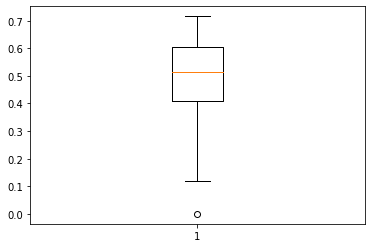

In [ ]:
plt.boxplot(happy['Explained by: Freedom to make life choices'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd60388b410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd6038933d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd60389b410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd603893e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd60388b910>,
  <matplotlib.lines.Line2D at 0x7fd60388be50>]}

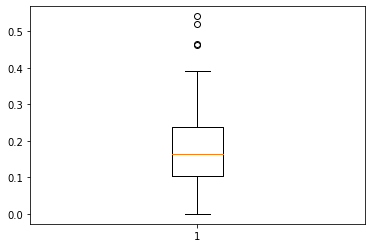

In [ ]:
plt.boxplot(happy['Explained by: Generosity'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd6037ff150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd603806110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd60380e150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd603806bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd6037ff650>,
  <matplotlib.lines.Line2D at 0x7fd6037ffb90>]}

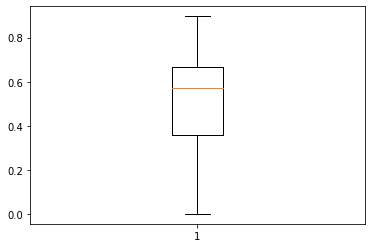

In [ ]:
plt.boxplot(happy['Explained by: Healthy life expectancy'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd60376e650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd603775610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd60377b650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd60377b110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd60376eb50>,
  <matplotlib.lines.Line2D at 0x7fd6037750d0>]}

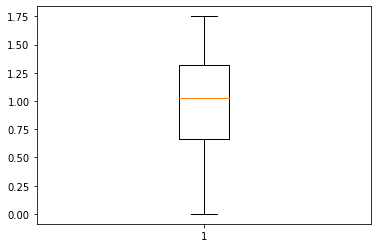

In [ ]:
plt.boxplot(happy['Explained by: Log GDP per capita'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd60375ced0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd603763e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6036eaed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6036ea990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd603763410>,
  <matplotlib.lines.Line2D at 0x7fd603763950>]}

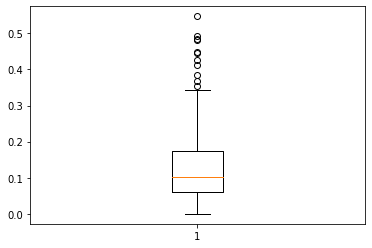

In [ ]:
plt.boxplot(happy['Explained by: Perceptions of corruption'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd6036ce7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd6036d2790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6036da7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6036da290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd6036cecd0>,
  <matplotlib.lines.Line2D at 0x7fd6036d2250>]}

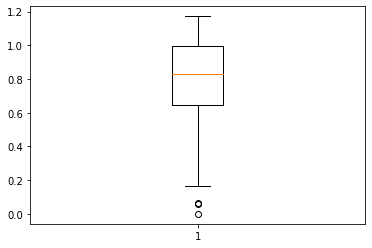

In [ ]:
plt.boxplot(happy['Explained by: Social support'])

Treatment of outliers for 'Explained by: Freedom to make life choices'

In [ ]:
for x in ['Explained by: Freedom to make life choices']:
    q75,q25 = np.percentile(happy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    happy.loc[happy[x] < min,x] = np.nan
    happy.loc[happy[x] > max,x] = np.nan
  

In [ ]:
happy.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    1
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [ ]:
happy = happy.dropna(axis = 0)

In [ ]:
happy.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Treatment of outliers for 'Explained by: Generosity'

In [ ]:
for x in ['Explained by: Generosity']:
    q75,q25 = np.percentile(happy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    happy.loc[happy[x] < min,x] = np.nan
    happy.loc[happy[x] > max,x] = np.nan
  

In [ ]:
happy.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      4
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [ ]:
happy = happy.dropna(axis = 0)

In [ ]:
happy.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [ ]:
happy.fillna(0, inplace = True)

Data Normalization

In [ ]:
normalized_happy=(happy-happy.mean())/happy.std()

In [ ]:
normalized_happy.fillna(0, inplace = True)

In [ ]:
print(normalized_happy)

     Country name  Dystopia + residual  ...  lowerwhisker  upperwhisker
0               0             1.517002  ...      2.173232      2.154696
1               0             0.796032  ...      1.959126      1.943218
2               0             0.741725  ...      1.910295      1.900338
3               0             0.981425  ...      1.852073      1.926651
4               0             0.664947  ...      1.825780      1.778519
..            ...                  ...  ...           ...           ...
143             0            -0.473624  ...     -1.922007     -1.863386
144             0            -1.203958  ...     -2.056293     -1.895546
145             0            -3.361250  ...     -2.013096     -2.029060
146             0            -2.524176  ...     -2.050658     -2.090457
147             0            -2.318184  ...     -2.287301     -2.372103

[144 rows x 20 columns]


Finding ideal number of clusters using Silhouette and Elbow Method 

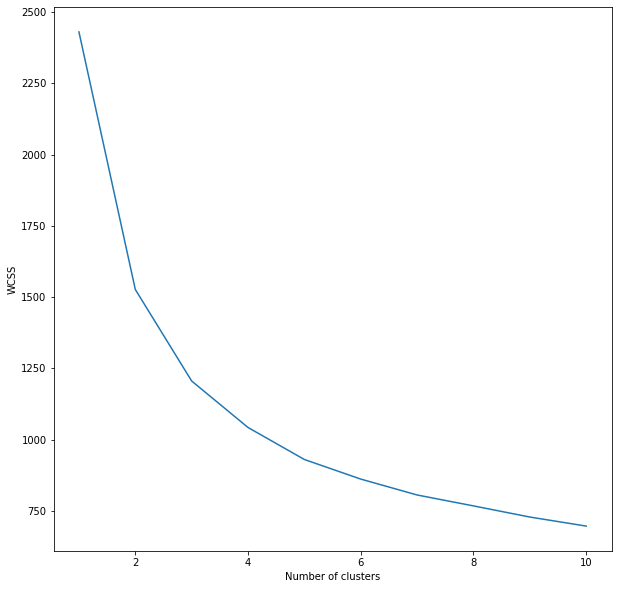

In [ ]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(normalized_happy)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Applying Elbow method

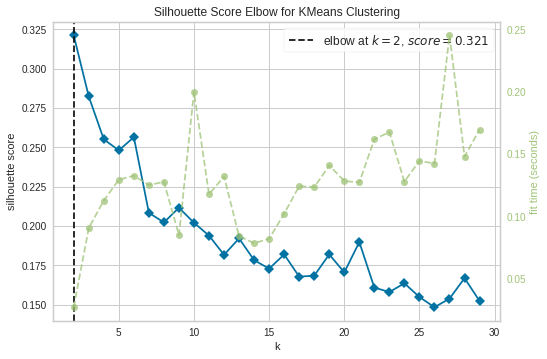

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(normalized_happy)     
visualizer.show()

Dimensionality Reduction using *PCA*

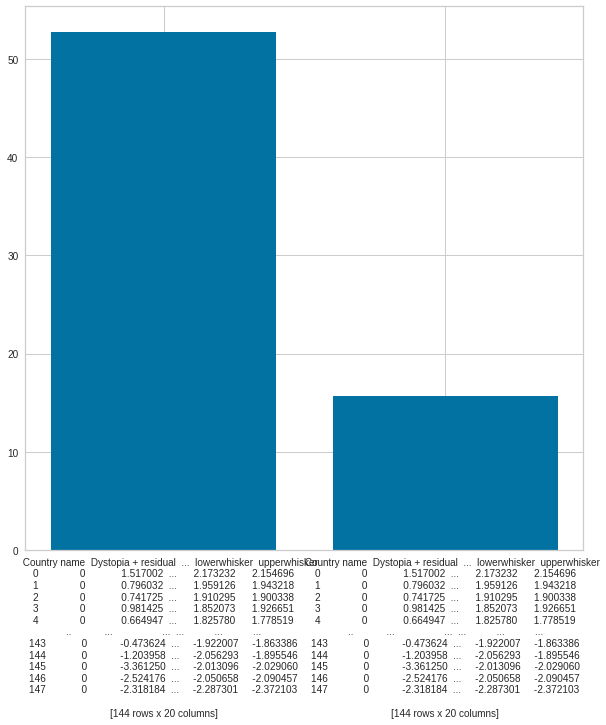

In [ ]:
pca = PCA(2)
data = pca.fit_transform(normalized_happy)
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(normalized_happy) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

Applying k-means  on the reduced PCA dataset

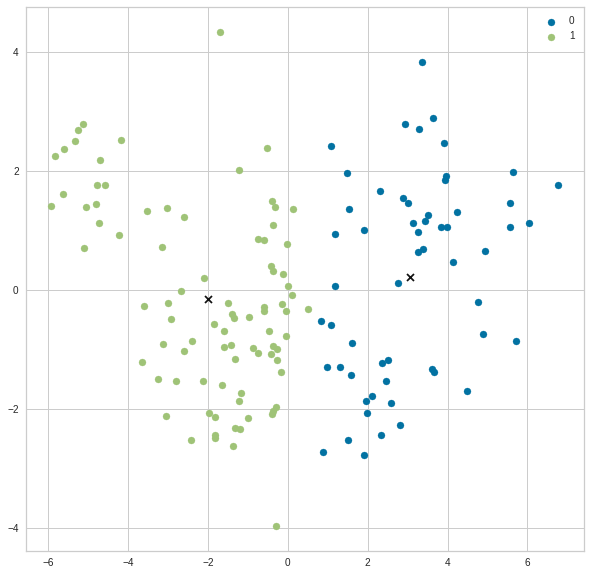

In [ ]:
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(data)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i, 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()

In [ ]:
PCA_components = pd.DataFrame(data)
PCA_components

,0,1
0,-5.933540,1.408433
1,-5.825447,2.256646
2,-5.635828,1.613822
3,-4.786201,1.768356
4,-5.266630,2.693021
...,...,...
139,5.634024,1.978135
140,5.713454,-0.850550
141,2.817246,-2.261699
142,3.364069,3.823995


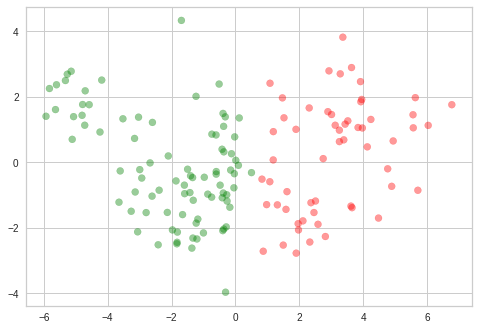

In [ ]:
colors = ['red', 'green']
features_colors = [ colors[label[i]] for i in range(len(PCA_components.iloc[:,:2])) ]
T=PCA_components.iloc[:,:2]   
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4
        )

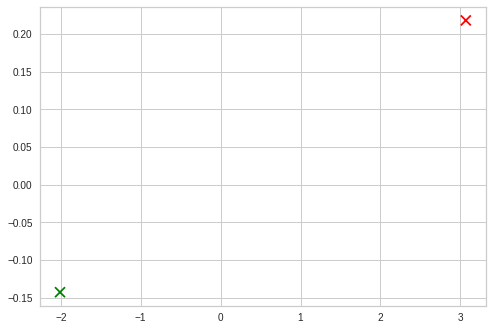

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

In [ ]:
xvector = pca.components_[0] * np.max(T[0])
yvector = pca.components_[1] * np.max(T[1])
columns = normalized_happy.columns


Projecting each original feature on Principal Component Axis

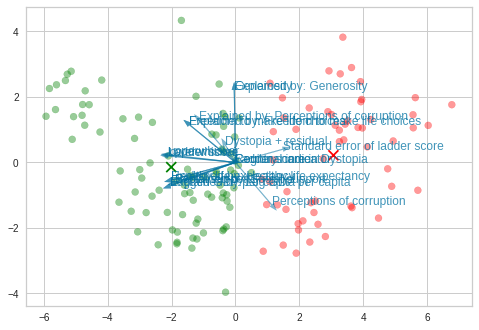

In [ ]:
for i in range(len(columns)):
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.025,
                head_width=0.15, alpha=0.5
            )
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=features_colors, marker='o',
            alpha=0.4)

plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors )            
plt.show()

Plotting Dendogram

In [ ]:
happy.shape

(144, 20)

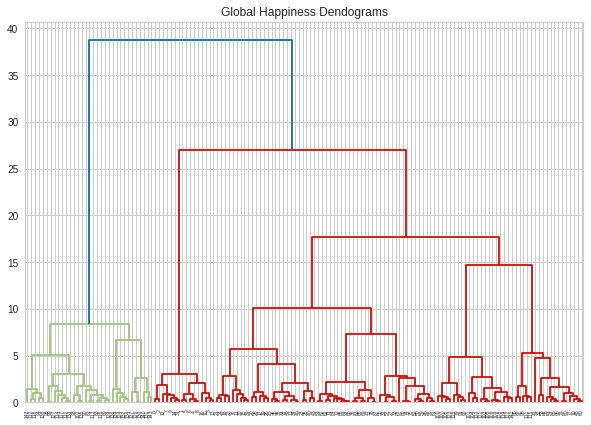

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Global Happiness Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that passes through longest distance without crossing a horizontal line, we get 3 clusters 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Projecting each feature on Principal Component Axis

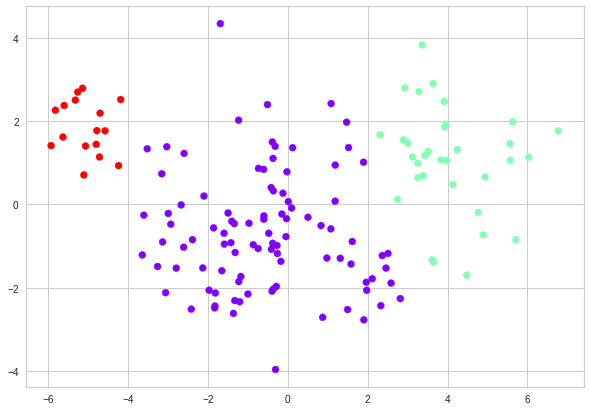

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
